https://github.com/NanoComp/meep/blob/master/python/examples/straight-waveguide.ipynb  

https://stackoverflow.com/questions/29454002/filenotfounderror-errno-2-no-such-file-or-directory-ffmpeg


In [3]:
import math
import meep as mp
from meep import mpb

import numpy as np
import matplotlib.pyplot as plt

Using MPI version 3.1, 1 processes


In [4]:
PhC = True
lengthPhC = 20
decay_check=0
T_decay=500

##### setting of parameters #####
a = 1 # CADに移行しやすいように予め設定しておく
widthPhC = 15
ConnectionWaveguide = 5
wgi = 1
r = 1/4
d_0 = 0.8*a
n_eff = 2.6
fcen = 0.3 
df = 0.1
nfreq = 500 # number of frequencies at which to compute flux
resolution = 16

#####
length = lengthPhC + 2*ConnectionWaveguide
width = widthPhC
Nx = int(lengthPhC)
Ny = int(widthPhC)
eps = n_eff**2

##### settings of geometry #####
# initialization
cell = mp.Vector3(length,width*np.sqrt(3),0)

# Si waveguide
waveguide = mp.Block(mp.Vector3(mp.inf,wgi*np.sqrt(3),mp.inf),
                        center=mp.Vector3(),
                        material=mp.Medium(epsilon=eps))
geometry = [waveguide]

# PhC
if PhC:
    # triangle
    tri_up = [mp.Vector3(-np.sqrt(3)/2,-1/2)*d_0/np.sqrt(3),
              mp.Vector3( np.sqrt(3)/2,-1/2)*d_0/np.sqrt(3),
              mp.Vector3(            0,   1)*d_0/np.sqrt(3),
              ]

    # slab
    blk = mp.Block(mp.Vector3(lengthPhC,widthPhC*np.sqrt(3),mp.inf),
                            center=mp.Vector3(),
                            material=mp.Medium(epsilon=eps))

    geometry.append(blk)
    
    # arrange air-holes
    for j in range(Ny):
        for i in range(Nx+1):
            shift_y = np.sqrt(3)
            geometry.append(mp.Prism(tri_up, height = 1, center=mp.Vector3(i-Nx/2, wgi*np.sqrt(3)/2 + shift_y*j)))
            geometry.append(mp.Prism(tri_up, height = 1, center=mp.Vector3(i-Nx/2, -(wgi*np.sqrt(3)/2 + shift_y*j))))

            geometry.append(mp.Prism(tri_up, height = 1, center=mp.Vector3(i-(Nx+1)/2, wgi*np.sqrt(3)/2 + shift_y*(j+1/2))))
            geometry.append(mp.Prism(tri_up, height = 1, center=mp.Vector3(i-(Nx+1)/2, -(wgi*np.sqrt(3)/2 + shift_y*(j+1/2)))))
            #geometry.append(mp.Cylinder(r, center=mp.Vector3(i-N/2,-wgi*np.sqrt(3)/2)))

# Gaussian
sources = [mp.Source(mp.GaussianSource(fcen, fwidth=df),
                        component=mp.Hz,
                        center=mp.Vector3(-length/2 +1,0),
                        size=mp.Vector3(0,wgi*np.sqrt(3)))
            ]

# PML
pml_layers = [mp.PML(1.0)]

# z-symmetry (上下対称なら計算が軽くなる。対称性が無いなら消す)
sym = [mp.Mirror(mp.Y, phase=-1)]


####
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    symmetries=sym,
                    resolution=resolution)


-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.0527289 s
Working in 2D dimensions.
Computational cell is 30 x 26 x 0 with resolution 16
     block, center = (0,0,0)
          size (1e+20,1.73205,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6.76,6.76,6.76)
     block, center = (0,0,0)
          size (20,25.9808,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6.76,6.76,6.76)
     prism, center = (-10,0.866025,0)
          height 1, axis (0,0,1), sidewall angle: 0 radians, 3 vertices:
          (-10.4,0.635085,-0.5)
          (-9.6,0.635085,-0.5)
          (-10,1.32791,-0.5)
          dielectric constant epsilon diagonal = (1,1,1)
     prism, center = (-10,-0.866025,0)
          height 1, axis (0,0,1), sidewall angle: 0 radians, 3 vertices:
          (-10.4,-1.09697,-0.5)
          (-9.6,-1.09697,-0.5)
          (-10,-

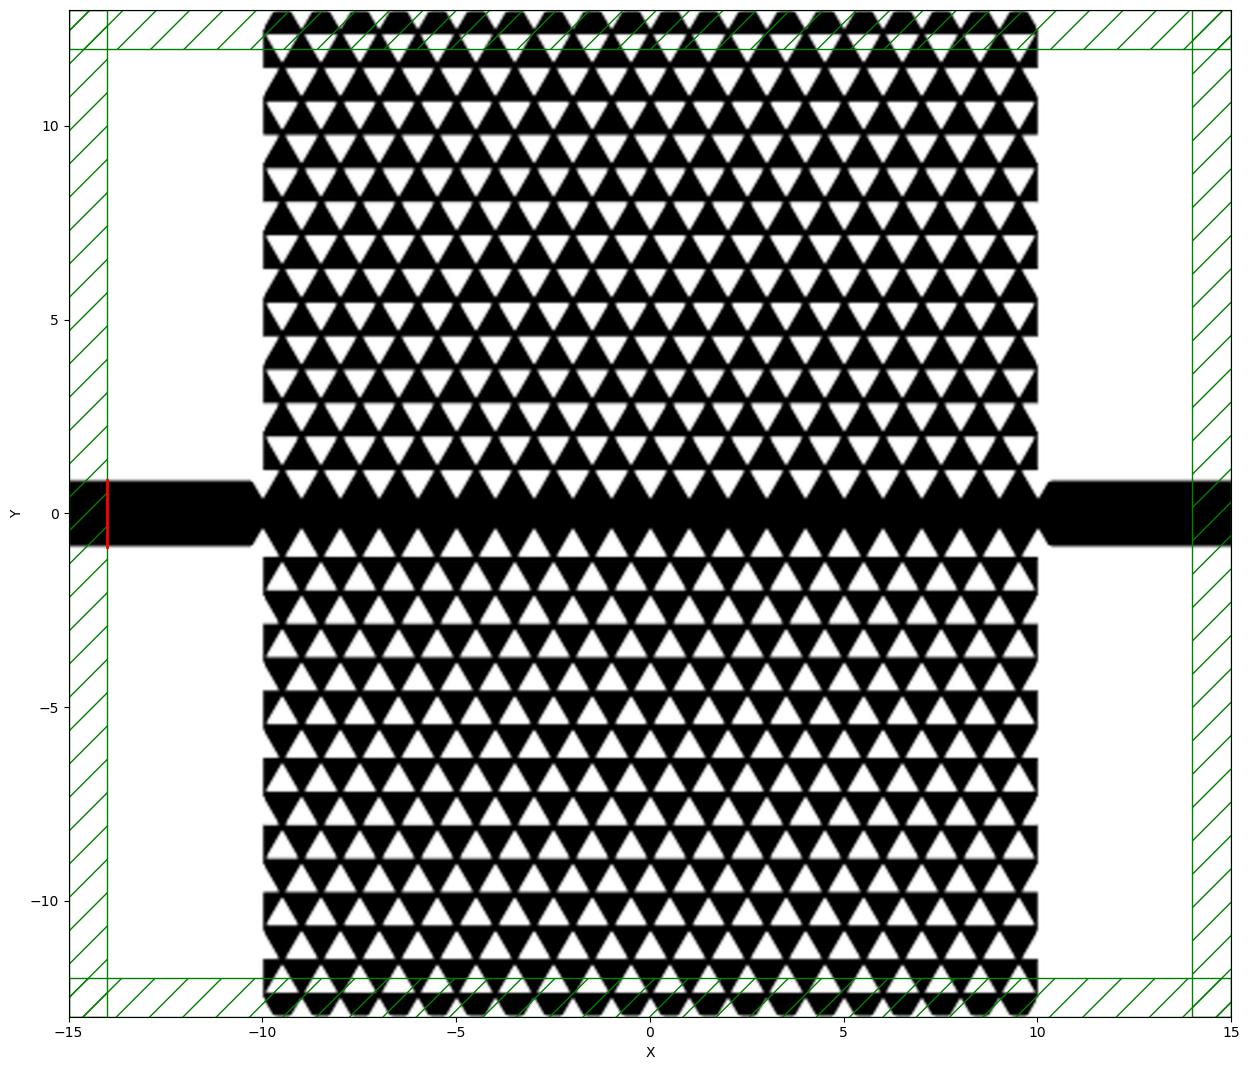

In [5]:
%matplotlib inline
plt.figure(dpi=100, figsize=(15,30))
sim.plot2D()
plt.show()

FloatProgress(value=0.0, description='0% done ')

Meep progress: 61.28125/100.0 = 61.3% done in 4.0s, 2.5s to go
on time step 1991 (time=62.2188), 0.00200957 s/step
run 0 finished at t = 100.0 (3200 timesteps)


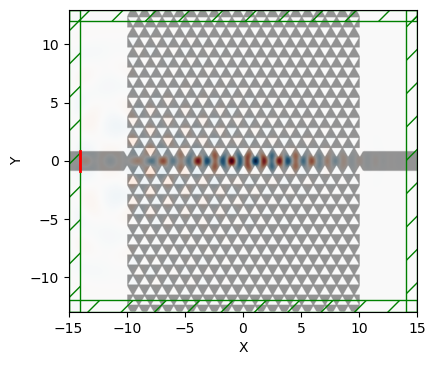

In [6]:
sim.run(until=100)

plt.figure(dpi=100)
sim.plot2D(fields=mp.Hz)
plt.show()

In [7]:
T=1

sim.reset_meep()
f = plt.figure(dpi=100)
Animate = mp.Animate2D(sim, fields=mp.Hz, f=f, realtime=False, normalize=True)
sim.run(mp.at_every(T,Animate),until=T*300)
plt.close()

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.054539 s
Working in 2D dimensions.
Computational cell is 30 x 26 x 0 with resolution 16
     block, center = (0,0,0)
          size (1e+20,1.73205,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6.76,6.76,6.76)
     block, center = (0,0,0)
          size (20,25.9808,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6.76,6.76,6.76)
     prism, center = (-10,0.866025,0)
          height 1, axis (0,0,1), sidewall angle: 0 radians, 3 vertices:
          (-10.4,0.635085,-0.5)
          (-9.6,0.635085,-0.5)
          (-10,1.32791,-0.5)
          dielectric constant epsilon diagonal = (1,1,1)
     prism, center = (-10,-0.866025,0)
          height 1, axis (0,0,1), sidewall angle: 0 radians, 3 vertices:
          (-10.4,-1.09697,-0.5)
          (-9.6,-1.09697,-0.5)
          (-10,-0

FloatProgress(value=0.0, description='0% done ', max=300.0)

Meep progress: 31.84375/300.0 = 10.6% done in 4.0s, 33.7s to go
on time step 1024 (time=32), 0.00394055 s/step
Meep progress: 78.625/300.0 = 26.2% done in 8.0s, 22.5s to go
on time step 2528 (time=79), 0.00267142 s/step
Meep progress: 126.4375/300.0 = 42.1% done in 12.0s, 16.5s to go
on time step 4064 (time=127), 0.0026102 s/step
Meep progress: 169.46875/300.0 = 56.5% done in 16.0s, 12.3s to go
on time step 5450 (time=170.312), 0.00288688 s/step
Meep progress: 223.34375/300.0 = 74.4% done in 20.0s, 6.9s to go
on time step 7168 (time=224), 0.00232984 s/step
Meep progress: 274.0/300.0 = 91.3% done in 24.0s, 2.3s to go
on time step 8783 (time=274.469), 0.00247687 s/step
Normalizing field data...
run 1 finished at t = 300.0 (9600 timesteps)


In [12]:
#Animate.to_gif(10,"test.gif")

filename = "straight_waveguide.mp4"
Animate.to_mp4(10,filename)

Generating MP4...


In [13]:
from IPython.display import Video
Video(filename)

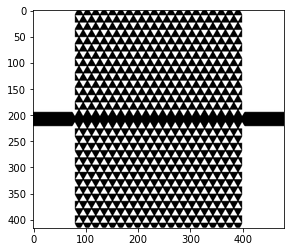

In [10]:
eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
#plt.axis('off')
plt.show()

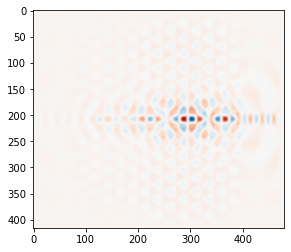

In [11]:
hz_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Hz)
plt.figure()
#plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(hz_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
#plt.axis('off')
plt.show()

In [14]:
%pwd

'/mnt/c/Users/fkh/.vscode/extensions/ms-vscode-remote.remote-wsl-0.50.1'